### Damage test

#### Libraries etc

In [1]:
import os
import math
import numpy as np
import matplotlib as mpl
from scipy.io import netcdf as nc
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
#from collections import OrderedDict
from matplotlib import cm
import csv
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


# colours for canopy/understory and FATES/Data
dark = cm.get_cmap('Paired', 12)
colormap = dark(range(12))

#### Load FATES

In [2]:
# Damage
filename_in = '/Users/JFNeedham/Desktop/damage_tests/damage_test.Ec63cce2acb-Fe5b01212.2022-10-21.elm.h0.fullrun.nc'
fin = nc.netcdf_file(filename_in)
time = fin.variables['time'][:] / 365.
dmdntime = len(time)
cohort_size_bins = fin.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)
patch_age_bins = fin.variables['fates_levage'][:]
nagebins = len(patch_age_bins)
cohort_damage_bins = fin.variables['fates_levcdam'][:] 
ndamagebins = len(cohort_damage_bins)

AGB = fin.variables['FATES_VEGC_ABOVEGROUND'][:]
NPLANTS = fin.variables['FATES_NPLANT_SZ'][:]
NPP = fin.variables['FATES_NPP'][:]
mortality_cdpf = fin.variables['FATES_MORTALITY_CDPF'][:]
cstarv_mortality_cdpf = fin.variables['FATES_M3_CDPF'][:]
damage_mortality_cdpf = fin.variables['FATES_M11_CDPF'][:]
nplant_cdpf = fin.variables['FATES_NPLANT_CDPF'][:]
ddbh_cdpf = fin.variables['FATES_DDBH_CDPF'][:]
#mortality_canopy_cdpf = fin.variables['FATES_MORTALITY_CANOPY_CDPF'][:]
nplant_canopy_cdpf = fin.variables['FATES_NPLANT_CANOPY_CDPF'][:]
ddbh_canopy_canopy_cdpf = fin.variables['FATES_DDBH_CANOPY_CDPF'][:]
mortality_ustory_cdpf = fin.variables['FATES_MORTALITY_USTORY_CDPF'][:]
nplant_ustory_cdpf = fin.variables['FATES_NPLANT_USTORY_CDPF'][:]
ddbh_ustory_cdpf = fin.variables['FATES_DDBH_USTORY_CDPF'][:]
fin.close()

# Default
filename_in = '/Users/JFNeedham/Desktop/dev_tests/elm_bci_dev_test.Ec63cce2acb-F600f74b5.2022-10-17.elm.h0.fullrun.nc'
fin = nc.netcdf_file(filename_in)
c_AGB = fin.variables['FATES_VEGC_ABOVEGROUND'][:]
c_NPLANTS = fin.variables['FATES_NPLANT_SZ'][:]
fin.close()

# Damage off
filename_in = '/Users/JFNeedham/Desktop/damage_tests/damage_off_test.Ec63cce2acb-Fe5b01212.2022-10-21.elm.h0.fullrun.nc'
fin = nc.netcdf_file(filename_in)
do_AGB = fin.variables['FATES_VEGC_ABOVEGROUND'][:]
do_NPLANTS = fin.variables['FATES_NPLANT_SZ'][:]
fin.close()

#### Number of plants and biomass

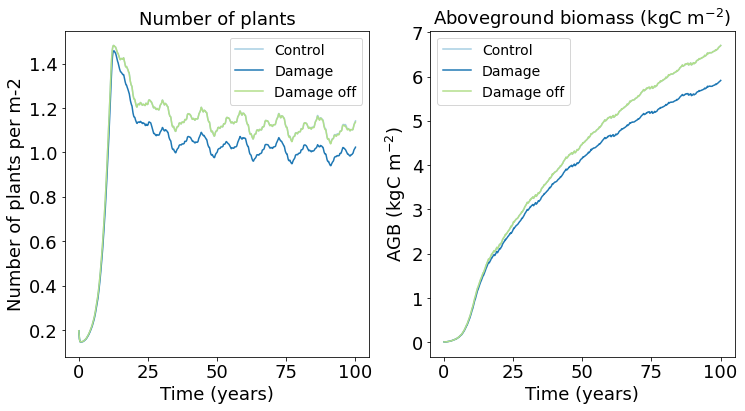

In [3]:
fig1, ((f1ax0, f1ax1)) = plt.subplots(nrows=1,ncols=2, figsize=(12,6))

### No. plants
f1ax0.plot(time, np.sum(c_NPLANTS, axis=1), label = 'Control', 
          color=colormap[0])
f1ax0.plot(time, np.sum(NPLANTS, axis=1), label = 'Damage', 
          color=colormap[1])
f1ax0.plot(time, np.sum(do_NPLANTS, axis=1), label = 'Damage off', 
          color=colormap[2])

f1ax0.set_title(r'Number of plants', fontsize = 18)
f1ax0.set_ylabel('Number of plants per m-2', fontsize = 18)
f1ax0.set_xlabel('Time (years)', fontsize=18)
f1ax0.tick_params(labelsize=18)
f1ax0.legend(prop={'size':14})

f1ax1.plot(time, c_AGB, label = 'Control', color=colormap[0])
f1ax1.plot(time, AGB, label =  'Damage', color = colormap[1])
f1ax1.plot(time, do_AGB, label =  'Damage off', color = colormap[2])
f1ax1.set_title(r'Aboveground biomass (kgC m$^{-2}$)', fontsize = 18)
f1ax1.set_ylabel('AGB (kgC m$^{-2}$)', fontsize = 18)
f1ax1.set_xlabel('Time (years)', fontsize=18)
f1ax1.tick_params(labelsize=18)
f1ax1.legend(prop={'size':14})

plt.savefig("NoPlants_AGB.png", format = 'png', dpi = 300, facecolor='white', edgecolor='white')


#### Mortality by damage 

(1200, 4, 12)


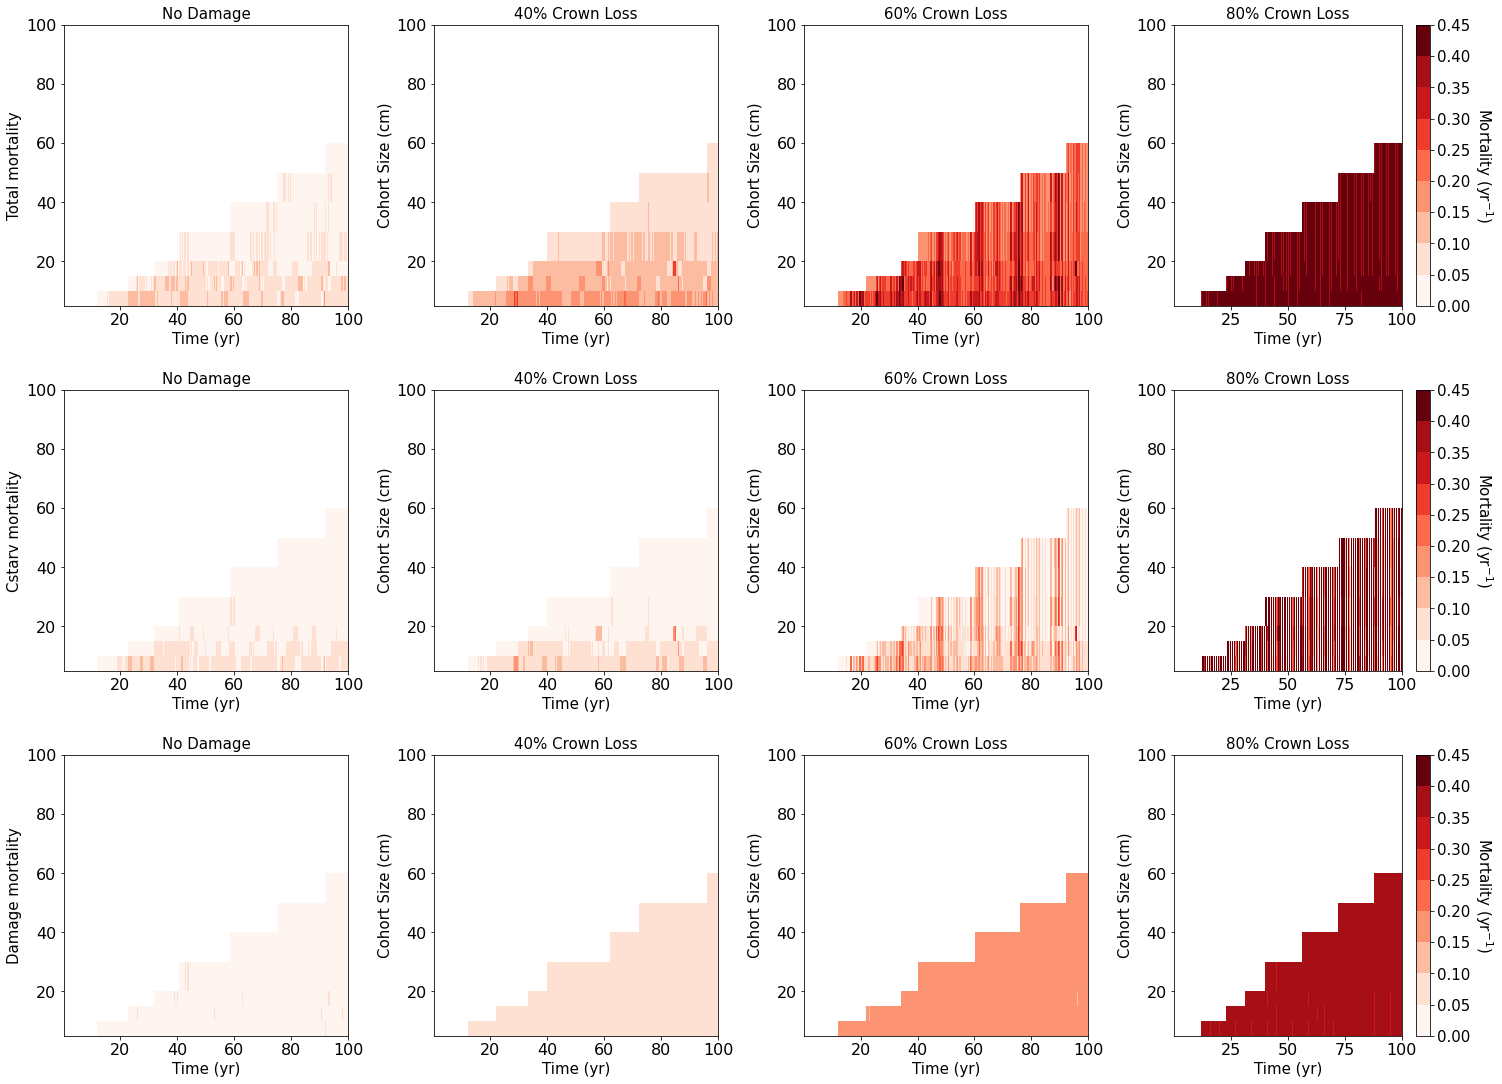

In [4]:
m = np.delete(np.reshape(np.squeeze(mortality_cdpf), (dmdntime,  ndamagebins, nsizebins)), 0, 2)
m3 = np.delete(np.reshape(np.squeeze(cstarv_mortality_cdpf), (dmdntime,  ndamagebins, nsizebins)), 0, 2)
m11 = np.delete(np.reshape(np.squeeze(damage_mortality_cdpf), (dmdntime,  ndamagebins, nsizebins)), 0, 2)
print(m.shape)
npl = np.delete(np.reshape(np.squeeze(nplant_cdpf), (dmdntime, ndamagebins, nsizebins)), 0, 2)


levels = np.arange(0.,0.5, 0.05)
cmap = plt.get_cmap('Reds')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig1, ((f1ax0, f1ax1, f1ax2, f1ax3), (f1ax4,f1ax5,f1ax6,f1ax7), (f1ax8,f1ax9,f1ax10,f1ax11)) = plt.subplots(nrows=3,ncols=4, figsize=(25,18))


im = f1ax0.pcolormesh(time, cohort_size_bins[1:], (m[:,0,:] / npl[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax0.set_title(r'No Damage', fontsize=15)
f1ax0.set_xlabel('Time (yr)', fontsize=15)
f1ax0.set_ylabel('Total mortality', fontsize=15)

f1ax0.tick_params(labelsize=16)

im = f1ax1.pcolormesh(time, cohort_size_bins[1:], (m[:,1,:] / npl[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f1ax1.set_title(r'40% Crown Loss', fontsize=15)
f1ax1.set_xlabel('Time (yr)', fontsize=15)
f1ax1.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax1.tick_params(labelsize=16)

im = f1ax2.pcolormesh(time, cohort_size_bins[1:], (m[:,2,:] / npl[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax2.set_title(r'60% Crown Loss', fontsize=15)
f1ax2.set_xlabel('Time (yr)', fontsize=15)
f1ax2.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax2.tick_params(labelsize=16)

im = f1ax3.pcolormesh(time, cohort_size_bins[1:], (m[:,3,:] / npl[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax3.set_title(r'80% Crown Loss', fontsize=15)
f1ax3.set_xlabel('Time (yr)', fontsize=15)
f1ax3.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax3.tick_params(labelsize=16)

im = f1ax4.pcolormesh(time, cohort_size_bins[1:], (m3[:,0,:] / npl[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax4.set_title(r'No Damage', fontsize=15)
f1ax4.set_xlabel('Time (yr)', fontsize=15)
f1ax4.set_ylabel('Cstarv mortality', fontsize=15)
f1ax4.tick_params(labelsize=16)

im = f1ax5.pcolormesh(time, cohort_size_bins[1:], (m3[:,1,:] / npl[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f1ax5.set_title(r'40% Crown Loss', fontsize=15)
f1ax5.set_xlabel('Time (yr)', fontsize=15)
f1ax5.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax5.tick_params(labelsize=16)

im = f1ax6.pcolormesh(time, cohort_size_bins[1:], (m3[:,2,:] / npl[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax6.set_title(r'60% Crown Loss', fontsize=15)
f1ax6.set_xlabel('Time (yr)', fontsize=15)
f1ax6.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax6.tick_params(labelsize=16)

im = f1ax7.pcolormesh(time, cohort_size_bins[1:], (m3[:,3,:] / npl[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax7.set_title(r'80% Crown Loss', fontsize=15)
f1ax7.set_xlabel('Time (yr)', fontsize=15)
f1ax7.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax7.tick_params(labelsize=16)


im = f1ax8.pcolormesh(time, cohort_size_bins[1:], (m11[:,0,:] / npl[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax8.set_title(r'No Damage', fontsize=15)
f1ax8.set_xlabel('Time (yr)', fontsize=15)
f1ax8.set_ylabel('Damage mortality', fontsize=15)
f1ax8.tick_params(labelsize=16)

im = f1ax9.pcolormesh(time, cohort_size_bins[1:], (m11[:,1,:] / npl[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f1ax9.set_title(r'40% Crown Loss', fontsize=15)
f1ax9.set_xlabel('Time (yr)', fontsize=15)
f1ax9.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax9.tick_params(labelsize=16)

im = f1ax10.pcolormesh(time, cohort_size_bins[1:], (m11[:,2,:] / npl[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax10.set_title(r'60% Crown Loss', fontsize=15)
f1ax10.set_xlabel('Time (yr)', fontsize=15)
f1ax10.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax10.tick_params(labelsize=16)

im = f1ax11.pcolormesh(time, cohort_size_bins[1:], (m11[:,3,:] / npl[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax11.set_title(r'80% Crown Loss', fontsize=15)
f1ax11.set_xlabel('Time (yr)', fontsize=15)
f1ax11.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax11.tick_params(labelsize=16)


cbar = fig1.colorbar(im, ax=f1ax3)
cbar.ax.tick_params(labelsize=15) 
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel(r'Mortality (yr$^{-1})$', rotation=270, fontsize=15)

cbar = fig1.colorbar(im, ax=f1ax7)
cbar.ax.tick_params(labelsize=15) 
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel(r'Mortality (yr$^{-1})$', rotation=270, fontsize=15)

cbar = fig1.colorbar(im, ax=f1ax11)
cbar.ax.tick_params(labelsize=15) 
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel(r'Mortality (yr$^{-1})$', rotation=270, fontsize=15)

plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

plt.savefig("Mortxdamagexsize.png", format = 'png', dpi = 300, facecolor='white', edgecolor='white')


#### Number of plants and ddbh by damage by size

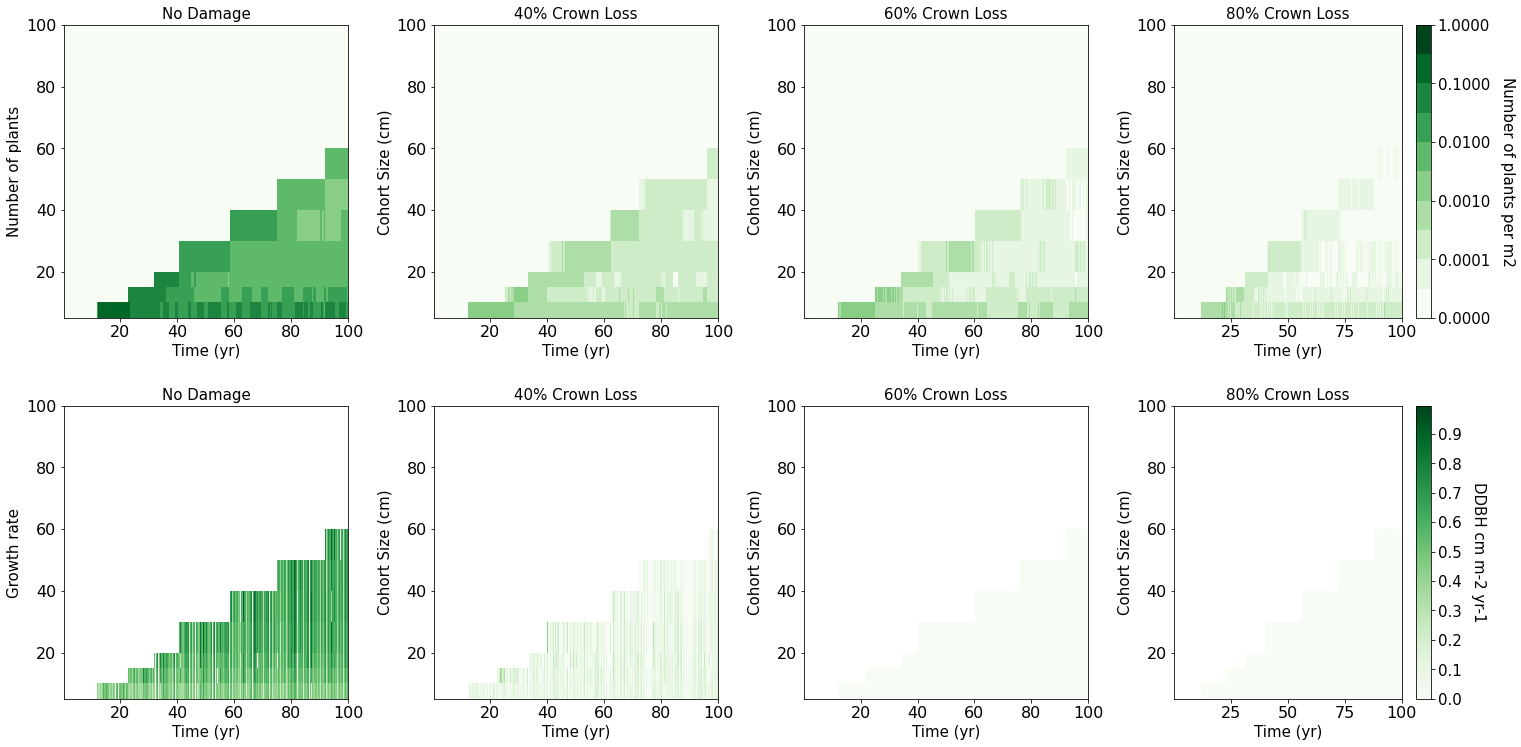

In [5]:
npl = np.delete(np.reshape(np.squeeze(nplant_cdpf), (dmdntime, ndamagebins, nsizebins)), 0, 2)
ddbh = np.delete(np.reshape(np.squeeze(ddbh_cdpf), (dmdntime,  ndamagebins, nsizebins)), 0, 2)

levels = np.array([0.1,0.3,1.,3.,10.,30., 100.,300.,1000., 3000., 10000.])*1/10000 # do a pseudo-log scale here
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig1, ((f1ax0, f1ax1, f1ax2, f1ax3),(f1ax4, f1ax5, f1ax6, f1ax7)) = plt.subplots(nrows=2,ncols=4, figsize=(25,12))


im = f1ax0.pcolormesh(time, cohort_size_bins[1:], (npl[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax0.set_title(r'No Damage', fontsize=15)
f1ax0.set_xlabel('Time (yr)', fontsize=15)
f1ax0.set_ylabel('Number of plants', fontsize=15)
f1ax0.tick_params(labelsize=16)

im = f1ax1.pcolormesh(time, cohort_size_bins[1:], (npl[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f1ax1.set_title(r'40% Crown Loss', fontsize=15)
f1ax1.set_xlabel('Time (yr)', fontsize=15)
f1ax1.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax1.tick_params(labelsize=16)

im = f1ax2.pcolormesh(time, cohort_size_bins[1:], (npl[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax2.set_title(r'60% Crown Loss', fontsize=15)
f1ax2.set_xlabel('Time (yr)', fontsize=15)
f1ax2.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax2.tick_params(labelsize=16)

im = f1ax3.pcolormesh(time, cohort_size_bins[1:], (npl[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f1ax3.set_title(r'80% Crown Loss', fontsize=15)
f1ax3.set_xlabel('Time (yr)', fontsize=15)
f1ax3.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax3.tick_params(labelsize=16)


cbar = fig1.colorbar(im, ax=f1ax3)
cbar.ax.tick_params(labelsize=15) 
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel(r'Number of plants per m2', rotation=270, fontsize=15)

levels = np.arange(0.,1, 0.005)
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


im = f1ax4.pcolormesh(time, cohort_size_bins[1:], (ddbh[:,0,:]/npl[:,0,:]*100).transpose(),
                      cmap=cmap, norm=norm)
f1ax4.set_title(r'No Damage', fontsize=15)
f1ax4.set_xlabel('Time (yr)', fontsize=15)
f1ax4.set_ylabel('Growth rate', fontsize=15)
f1ax4.tick_params(labelsize=16)

im = f1ax5.pcolormesh(time, cohort_size_bins[1:], (ddbh[:,1,:]/npl[:,1,:]*100).transpose(), 
                      cmap=cmap, norm=norm)
f1ax5.set_title(r'40% Crown Loss', fontsize=15)
f1ax5.set_xlabel('Time (yr)', fontsize=15)
f1ax5.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax5.tick_params(labelsize=16)

im = f1ax6.pcolormesh(time, cohort_size_bins[1:], (ddbh[:,2,:]/npl[:,2,:]*100).transpose(),
                      cmap=cmap, norm=norm)
f1ax6.set_title(r'60% Crown Loss', fontsize=15)
f1ax6.set_xlabel('Time (yr)', fontsize=15)
f1ax6.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax6.tick_params(labelsize=16)

im = f1ax7.pcolormesh(time, cohort_size_bins[1:], (ddbh[:,3,:]/npl[:,3,:]*100).transpose(),
                      cmap=cmap, norm=norm)
f1ax7.set_title(r'80% Crown Loss', fontsize=15)
f1ax7.set_xlabel('Time (yr)', fontsize=15)
f1ax7.set_ylabel('Cohort Size (cm)', fontsize=15)
f1ax7.tick_params(labelsize=16)


cbar = fig1.colorbar(im, ax=f1ax7)
cbar.ax.tick_params(labelsize=15) 
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel(r'DDBH cm m-2 yr-1', rotation=270, fontsize=15)

plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)


plt.savefig("Noplants_ddbh.png", format = 'png', dpi = 300, facecolor='white', edgecolor='white')


### Load the two pft file - no mortality 

In [8]:
# Damage
filename_in = '/Users/JFNeedham/Desktop/damage_tests/damage_test_nomort_two_pfts.Ec63cce2acb-Fe5b01212.2022-10-22.elm.h0.fullrun.nc'
fin = nc.netcdf_file(filename_in)
d2_time = fin.variables['time'][:] / 365.
dmdn2time = len(d2_time)
cohort_size_bins = fin.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)
patch_age_bins = fin.variables['fates_levage'][:]
nagebins = len(patch_age_bins)
cohort_damage_bins = fin.variables['fates_levcdam'][:] 
ndamagebins = len(cohort_damage_bins)

NPLANT_CANOPY_CDPF = fin.variables['FATES_NPLANT_CANOPY_CDPF'][:]
DDBH_CANOPY_CDPF = fin.variables['FATES_DDBH_CANOPY_CDPF'][:]
AGB_SCPF = fin.variables['FATES_VEGC_ABOVEGROUND_SZPF'][:]

fin.close()


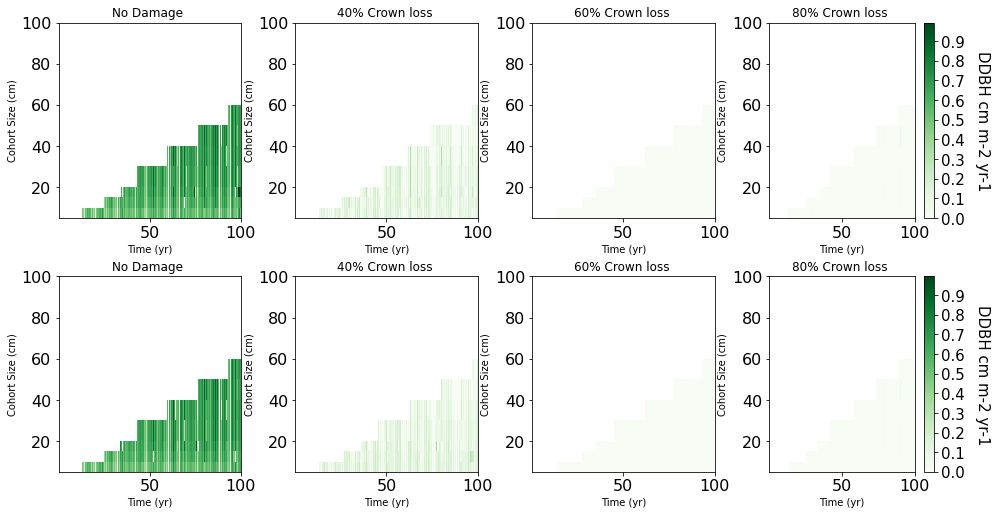

In [19]:
fig7, ((f7ax0,f7ax1,f7ax2,f7ax3),(f7ax4,f7ax5,f7ax6,f7ax7))=plt.subplots(nrows=2,ncols=4, figsize=(16,8))

npl = np.reshape(NPLANT_CANOPY_CDPF, (dmdn2time, 2, ndamagebins, nsizebins))
ddbh = np.reshape(DDBH_CANOPY_CDPF, (dmdn2time, 2, ndamagebins, nsizebins)) * 100
npl1 = npl[:,0,:,1:]
npl2 = npl[:,1,:,1:]
ddbh1 = ddbh[:,0,:,1:]
ddbh2 = ddbh[:,1,:,1:]

levels = np.arange(0.,1, 0.005)
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

im = f7ax0.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh1[:,0,:]/npl1[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax0.set_title(r'No Damage ')
f7ax0.set_xlabel('Time (yr)')
f7ax0.set_ylabel('Cohort Size (cm)')
f7ax0.tick_params(labelsize=16)

im = f7ax1.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh1[:,1,:]/npl1[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f7ax1.set_title(r'40% Crown loss ')
f7ax1.set_xlabel('Time (yr)')
f7ax1.set_ylabel('Cohort Size (cm)')
f7ax1.tick_params(labelsize=16)


im = f7ax2.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh1[:,2,:]/npl1[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax2.set_title(r'60% Crown loss ')
f7ax2.set_xlabel('Time (yr)')
f7ax2.set_ylabel('Cohort Size (cm)')
f7ax2.tick_params(labelsize=16)

im = f7ax3.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh1[:,3,:]/npl1[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax3.set_title(r'80% Crown loss ')
f7ax3.set_xlabel('Time (yr)')
f7ax3.set_ylabel('Cohort Size (cm)')
f7ax3.tick_params(labelsize=16)


im = f7ax4.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh2[:,0,:]/npl2[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax4.set_title(r'No Damage ')
f7ax4.set_xlabel('Time (yr)')
f7ax4.set_ylabel('Cohort Size (cm)')
f7ax4.tick_params(labelsize=16)

im = f7ax5.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh2[:,1,:]/npl2[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f7ax5.set_title(r'40% Crown loss ')
f7ax5.set_xlabel('Time (yr)')
f7ax5.set_ylabel('Cohort Size (cm)')
f7ax5.tick_params(labelsize=16)


im = f7ax6.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh2[:,2,:]/npl2[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax6.set_title(r'60% Crown loss ')
f7ax6.set_xlabel('Time (yr)')
f7ax6.set_ylabel('Cohort Size (cm)')
f7ax6.tick_params(labelsize=16)

im = f7ax7.pcolormesh(d2_time, cohort_size_bins[1:], (ddbh2[:,3,:]/npl2[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax7.set_title(r'80% Crown loss ')
f7ax7.set_xlabel('Time (yr)')
f7ax7.set_ylabel('Cohort Size (cm)')
f7ax7.tick_params(labelsize=16)

cbar = fig7.colorbar(im, ax=f7ax7)
cbar.ax.tick_params(labelsize=15) 
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel(r'DDBH cm m-2 yr-1', rotation=270, fontsize=15)

cbar = fig7.colorbar(im, ax=f7ax3)
cbar.ax.tick_params(labelsize=15) 
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel(r'DDBH cm m-2 yr-1', rotation=270, fontsize=15)


plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

plt.savefig("Two_pfts_ddbh.png", format = 'png', dpi = 300, facecolor='white', edgecolor='white')

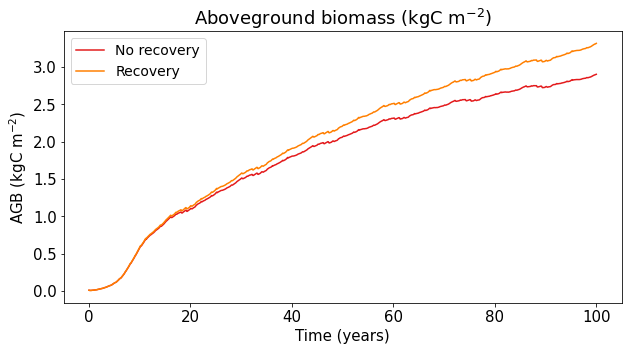

In [11]:
fig1, ((f1ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(10,5))

### AGB
f1ax0.plot(d2_time, np.sum(AGB_SCPF[:,0:nsizebins,:], axis=1), label = 'No recovery', 
          color=colormap[5])
f1ax0.plot(d2_time, np.sum(AGB_SCPF[:,nsizebins:,:], axis = 1), label = 'Recovery', color=colormap[7])
f1ax0.set_title(r'Aboveground biomass (kgC m$^{-2}$)', fontsize = 18)
f1ax0.set_ylabel('AGB (kgC m$^{-2}$)', fontsize = 15)
f1ax0.set_xlabel('Time (years)', fontsize=15)
f1ax0.tick_params(labelsize=15)
f1ax0.legend(prop={'size':14})

plt.savefig("Two_pfts_AGB", format = 'png', dpi = 300, facecolor='white', edgecolor='white')


In [16]:
# Damage
filename_in = '/Users/JFNeedham/Desktop/damage_tests/damage_test_two_pfts.Ec63cce2acb-Fe5b01212.2022-10-22.elm.h0.fullrun.nc'
fin = nc.netcdf_file(filename_in)
d2_time = fin.variables['time'][:] / 365.
dmdn2time = len(d2_time)
cohort_size_bins = fin.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)
patch_age_bins = fin.variables['fates_levage'][:]
nagebins = len(patch_age_bins)
cohort_damage_bins = fin.variables['fates_levcdam'][:] 
ndamagebins = len(cohort_damage_bins)

NPLANT_CANOPY_CDPF = fin.variables['FATES_NPLANT_CANOPY_CDPF'][:]
DDBH_CANOPY_CDPF = fin.variables['FATES_DDBH_CANOPY_CDPF'][:]
AGB_SCPF = fin.variables['FATES_VEGC_ABOVEGROUND_SZPF'][:]

fin.close()


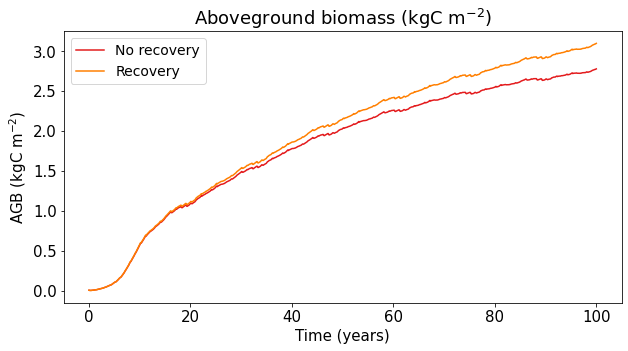

In [17]:
fig1, ((f1ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(10,5))

### AGB
f1ax0.plot(d2_time, np.sum(AGB_SCPF[:,0:nsizebins,:], axis=1), label = 'No recovery', 
          color=colormap[5])
f1ax0.plot(d2_time, np.sum(AGB_SCPF[:,nsizebins:,:], axis = 1), label = 'Recovery', color=colormap[7])
f1ax0.set_title(r'Aboveground biomass (kgC m$^{-2}$)', fontsize = 18)
f1ax0.set_ylabel('AGB (kgC m$^{-2}$)', fontsize = 15)
f1ax0.set_xlabel('Time (years)', fontsize=15)
f1ax0.tick_params(labelsize=15)
f1ax0.legend(prop={'size':14})

plt.savefig("Two_pfts_AGB", format = 'png', dpi = 300, facecolor='white', edgecolor='white')


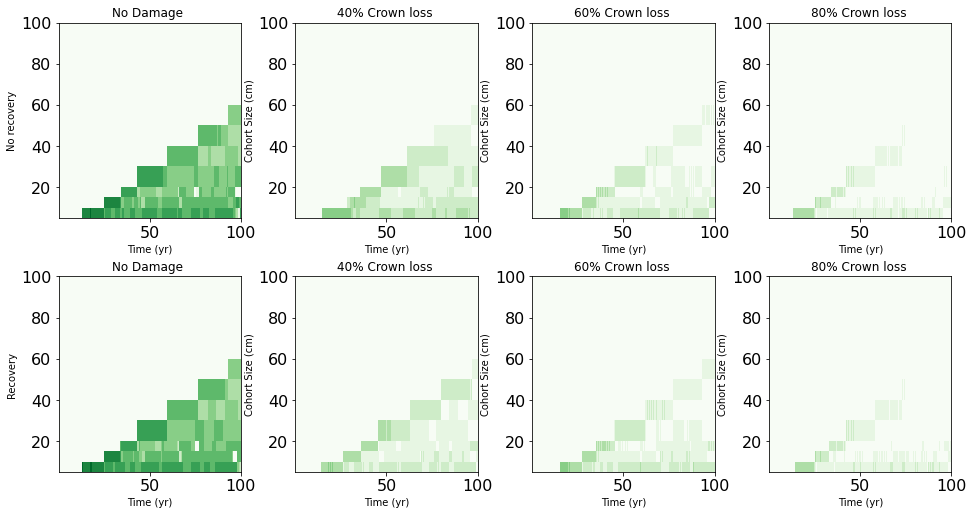

In [18]:
fig7, ((f7ax0,f7ax1,f7ax2,f7ax3),(f7ax4,f7ax5,f7ax6,f7ax7))=plt.subplots(nrows=2,ncols=4, figsize=(16,8))

npl = np.reshape(NPLANT_CANOPY_CDPF, (dmdn2time, 2, ndamagebins, nsizebins))
npl1 = npl[:,0,:,1:]
npl2 = npl[:,1,:,1:]

levels = np.array([0.1,0.3,1.,3.,10.,30., 100.,300.,1000., 3000., 10000.])*1/10000 # do a pseudo-log scale here
cmap = plt.get_cmap('Greens')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

im = f7ax0.pcolormesh(d2_time, cohort_size_bins[1:], (npl1[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax0.set_title(r'No Damage ')
f7ax0.set_xlabel('Time (yr)')
f7ax0.set_ylabel('No recovery')
f7ax0.tick_params(labelsize=16)

im = f7ax1.pcolormesh(d2_time, cohort_size_bins[1:], (npl1[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f7ax1.set_title(r'40% Crown loss ')
f7ax1.set_xlabel('Time (yr)')
f7ax1.set_ylabel('Cohort Size (cm)')
f7ax1.tick_params(labelsize=16)


im = f7ax2.pcolormesh(d2_time, cohort_size_bins[1:], (npl1[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax2.set_title(r'60% Crown loss ')
f7ax2.set_xlabel('Time (yr)')
f7ax2.set_ylabel('Cohort Size (cm)')
f7ax2.tick_params(labelsize=16)

im = f7ax3.pcolormesh(d2_time, cohort_size_bins[1:], (npl1[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax3.set_title(r'80% Crown loss ')
f7ax3.set_xlabel('Time (yr)')
f7ax3.set_ylabel('Cohort Size (cm)')
f7ax3.tick_params(labelsize=16)


im = f7ax4.pcolormesh(d2_time, cohort_size_bins[1:], (npl2[:,0,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax4.set_title(r'No Damage ')
f7ax4.set_xlabel('Time (yr)')
f7ax4.set_ylabel('Recovery')
f7ax4.tick_params(labelsize=16)

im = f7ax5.pcolormesh(d2_time, cohort_size_bins[1:], (npl2[:,1,:]).transpose(), 
                      cmap=cmap, norm=norm)
f7ax5.set_title(r'40% Crown loss ')
f7ax5.set_xlabel('Time (yr)')
f7ax5.set_ylabel('Cohort Size (cm)')
f7ax5.tick_params(labelsize=16)


im = f7ax6.pcolormesh(d2_time, cohort_size_bins[1:], (npl2[:,2,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax6.set_title(r'60% Crown loss ')
f7ax6.set_xlabel('Time (yr)')
f7ax6.set_ylabel('Cohort Size (cm)')
f7ax6.tick_params(labelsize=16)

im = f7ax7.pcolormesh(d2_time, cohort_size_bins[1:], (npl2[:,3,:]).transpose(),
                      cmap=cmap, norm=norm)
f7ax7.set_title(r'80% Crown loss ')
f7ax7.set_xlabel('Time (yr)')
f7ax7.set_ylabel('Cohort Size (cm)')
f7ax7.tick_params(labelsize=16)



plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

#plt.savefig("Two_pfts_ddbh.png", format = 'png', dpi = 300, facecolor='white', edgecolor='white')